In [1]:
import matplotlib.pyplot as plt

In [14]:
file_name = "random_output_double_hash_drbg.txt"
with open(file_name, "r") as f:
    contents = f.read()
double_drbg = [int(contents[i:i+2], base=16) for i in range(0, len(contents)//2, 2)]


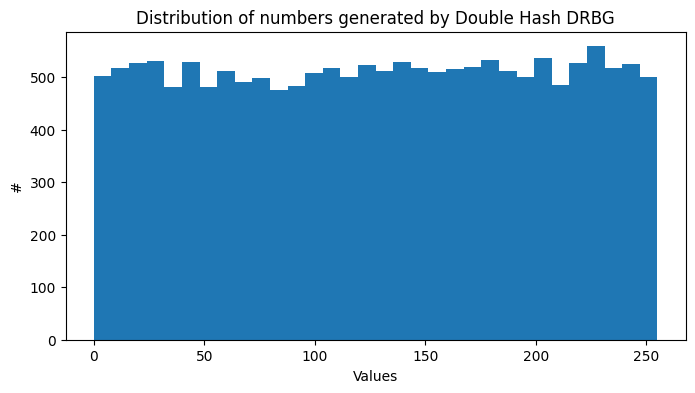

In [19]:
plt.figure(figsize=(8,4))
plt.title("Distribution of numbers generated by Double Hash DRBG")
plt.ylabel("#")
plt.xlabel("Values")
plt.hist(double_drbg, bins=32)
plt.show()

In [21]:
file_name = "random_output_hash_drbg.txt"
with open(file_name, "r") as f:
    contents = f.read()
hash_drbg = [int(contents[i:i+2], base=16) for i in range(0, len(contents)//2, 2)]

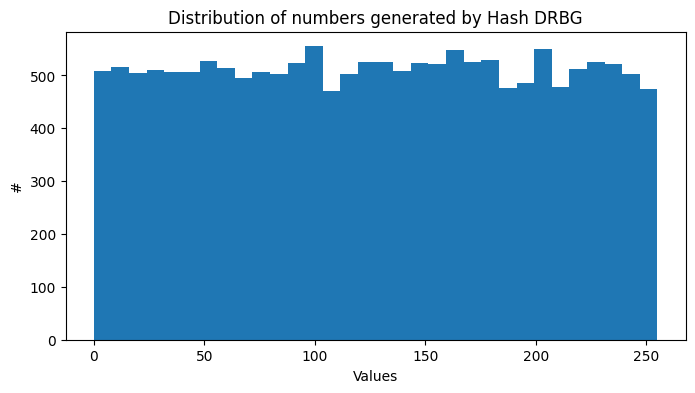

In [22]:
plt.figure(figsize=(8,4))
plt.title("Distribution of numbers generated by Hash DRBG")
plt.ylabel("#")
plt.xlabel("Values")
plt.hist(hash_drbg, bins=32)
plt.show()

In [8]:
import numpy as np
from scipy.stats import kstest
from scipy.stats import chisquare

def test_for_uniformity(data):
    num_bins = 256  # Adjust bin size as needed
    observed_freq, _ = np.histogram(data, bins=num_bins)
    
    # Expected frequency if uniform
    expected_freq = np.ones(num_bins) * len(data) / num_bins
    
    # Perform Chi-Square test
    chi_stat, p_value = chisquare(observed_freq, expected_freq)
    
    print(f"Chi-Square Statistic: {chi_stat}, P-value: {p_value}")
    
    if p_value > 0.05:
        print("Fail to reject the null hypothesis: Data may be uniform.")
    else:
        print("Reject the null hypothesis: Data is likely not uniform.")


In [36]:
test_for_uniformity(double_drbg)

Chi-Square Statistic: 241.6875, P-value: 0.7158013125450466
Fail to reject the null hypothesis: Data may be uniform.


In [37]:
test_for_uniformity(hash_drbg)

Chi-Square Statistic: 263.65625, P-value: 0.341455023406043
Fail to reject the null hypothesis: Data may be uniform.


In [29]:
file_name = "hash_drbg_consumer_numbers.bin"
with open(file_name, "rb") as f:
    contents = f.read()
decimated_drbg = [int(contents[i]) for i in range(0, len(contents)//2, 2)]


In [30]:

first_non_zero = 0
while (decimated_drbg[first_non_zero] == 0):
    first_non_zero += 1
decimated_drbg = decimated_drbg[first_non_zero:]
decimated_drbg[:20]

[196,
 129,
 203,
 142,
 137,
 50,
 133,
 30,
 102,
 150,
 245,
 112,
 250,
 179,
 203,
 241,
 229,
 254,
 10,
 131]

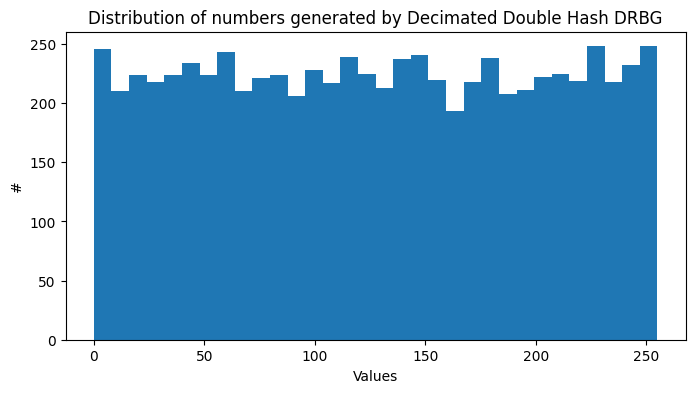

In [31]:
plt.figure(figsize=(8,4))
plt.title("Distribution of numbers generated by Decimated Double Hash DRBG")
plt.ylabel("#")
plt.xlabel("Values")
plt.hist(decimated_drbg, bins=32)
plt.show()

In [32]:
test_for_uniformity(decimated_drbg)

Chi-Square Statistic: 247.9109131403118, P-value: 0.6130480101584495
Fail to reject the null hypothesis: Data may be uniform.


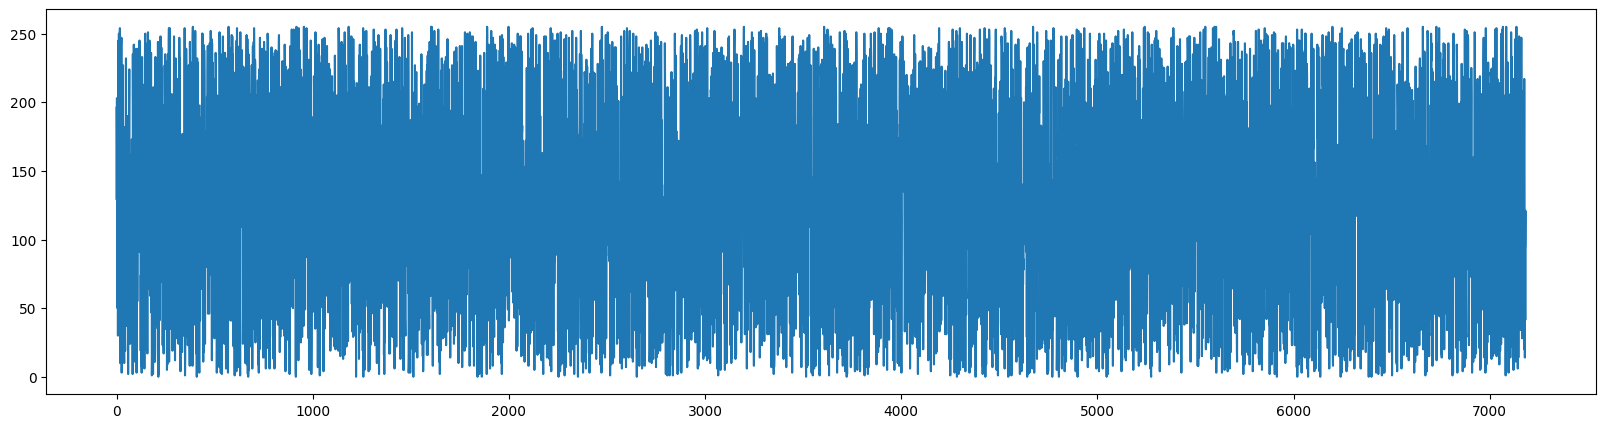

In [33]:
plt.figure(figsize=(20,5))
plt.plot(decimated_drbg)

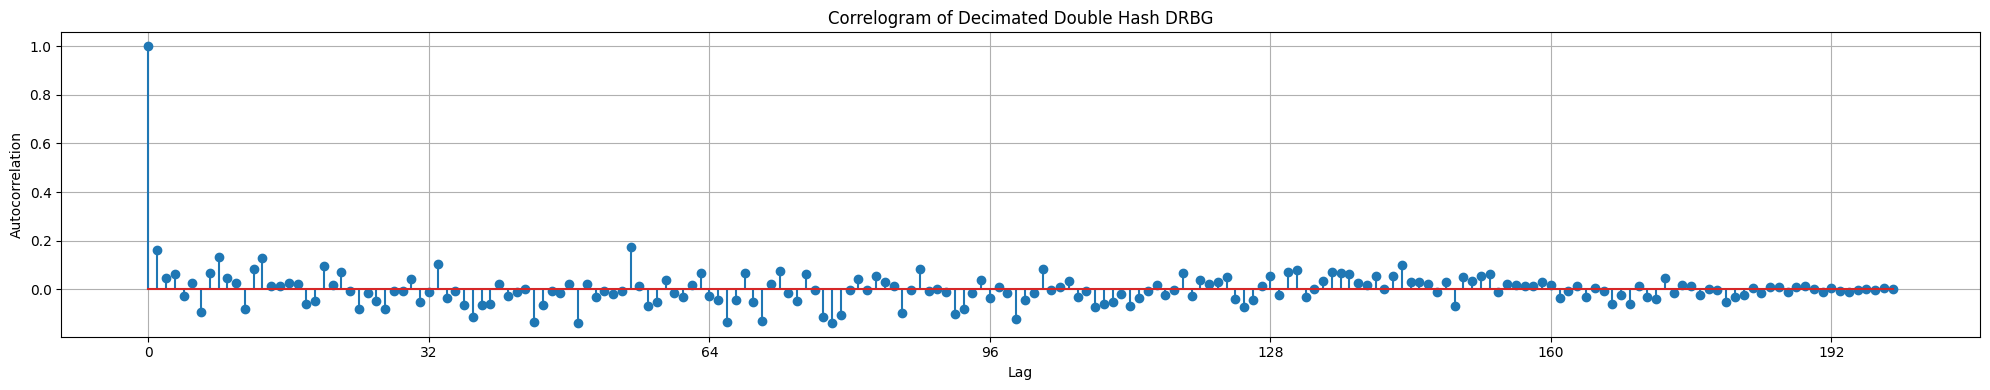

In [34]:
import numpy as np
import matplotlib.pyplot as plt


# Compute autocorrelation
def autocorr(x):
    n = len(x)
    result = np.correlate(x - np.mean(x), x - np.mean(x), mode='full')
    result = result / result[n - 1]  # Normalize
    return result[n - 1:]

# Plot the correlogram
lags = np.arange(0, len(decimated_drbg))
plt.figure(figsize=(20, 4))
plt.stem(lags[:200], autocorr(decimated_drbg[:200]))  # Removed use_line_collection
plt.xticks(np.arange(0, 201, 32))
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Correlogram of Decimated Double Hash DRBG')
plt.grid(True)
plt.tight_layout()
plt.show()
